# Journey from raw data to insights - Part 1

To understand the important parts of the journey of raw data -> insights, let's work through a real example. Say, as a simple problem statment that we want to analyze **movie genre trends** over the **last 10 years**.

To do so, first, we would need to obtain this data from somewhere.

## Obtaining Data 

Data can be collected in many ways. The most popular way is known as scraping. Scraping entails writing a script that collects data from different websites. However, for this project's purposes, let's work on a ready-made dataset.

For our problem statement, we are quite lucky as IMDB already provides us with the data set we need: [IMDB Dataset](https://www.imdb.com/interfaces/).

We specifically care about `title.basics.tsv.gz` as it contains title and genre names. I have saved the contents of `title.basics.tsv.gz`, and renamed it as: `imdb_titles.tsv`.

## Reading the Data

To take a look at and play around with the data, you have to first load it into python. 

However, as we mentioned before, all the code on Google Colab is run on an external server. This means we have to manually upload any files to that computer server first, and only then can we access it.

In the world of Google Colab, the simplest way is to upload the data to Google Drive and then import the data.

In [ ]:
# I have uploaded the data to the following path on google drive: Programming for Econ/Data

from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/My\ Drive/Applied\ Data\ Science\ in\ Python/Project  # Running a line with a "!" in the start is identical to running a bash script

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Datasets
 imdb_ratings.tsv
 imdb_titles.tsv
'Milestone1: Journey from Raw Data to Inference (Tutorial).ipynb'
'Projects: List of potential datasets.gdoc'


We can see that running `ls` on this external server results in a list of files that contain the IMDB data we care about. This means that the files are now on the server that we are executing this Google Colab notebook on. This should also be reflected by going to the file list on the left panel of this screen.

Small note, `.tsv` is a type of file similar to `.csv` but has elements seperated by tabs. 

Next step is to read the file into python. Reading a file into python simply means loading the contents of the file into a variable.

In [ ]:
# To read a file, we first load it into a Pandas DataFrame
import pandas as pd

titles = pd.read_csv('/content/drive/My Drive/Applied Data Science in Python/Project/imdb_titles.tsv', sep="\t")

titles

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
7101436,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
7101437,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
7101438,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
7101439,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


We notice that there are over 7 million lines in the file! Lets look at the data in a little more detail.

Based on the documentation given via the IMDB link, we know the following about the columns:
```
tconst (string) - alphanumeric unique identifier of the title
titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
originalTitle (string) - original title, in the original language
isAdult (boolean) - 0: non-adult title; 1: adult title
startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
runtimeMinutes – primary runtime of the title, in minutes
genres (string array) – includes up to three genres associated with the title
```


A couple of things stand out here. 

1. **We see that we have a lot of data that we don't really care about**: This data set has data about a wide number of title types. We only really care about movies for our specific case study. Similarly, we dont really care about titles, endYear or runtime.

2. **The data is inconsistent**: We see that there is missing data throughout and `\N` has been used as a placeholder.

3. **Data is in str format**: All the data we are parsing is in string format. If we were to make any changes, we would have to manually parse strings which could get quite tedious.


## Cleaning the data

Most likely, whenever you parse any dataset, you will want to clean the data to suit your needs. This cleaning may be because you want the data to be of a certain style or maybe because there are errors on the side of the data provider. 

In any case, you always want to follow the following steps at the very least when encountering a new dataset:

1. **Inspection**: Manually spot unexpected, incorrect, and inconsistent data.
2. **Fix**: Address the discovered anomalies.
3. **Verify**: Re-inspect the results to verify correctness.

### Inspection



#### Manual Data Parsing 

Taking a look at data like we did earlier can help you spot some red flags. We see some absurdly low and missing running times off the bat. There is a good possibility these entries are incorrect and therefore should be verified/filtered out.

In [ ]:
titles.head(n=20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


#### Vizualizing data

Looking at data on a plot can be very helpful in understanding the overall distribution and thus accordingly spot unexpected data. We will look at plotting in much more detail in later lectures. 

For now let's take a look at the histogram of runtimes to get a sense of the distribution.

In [ ]:
# Lets first take a look at the datatype of the column:
runtime = titles["runtimeMinutes"]
runtime.dtype

dtype('O')

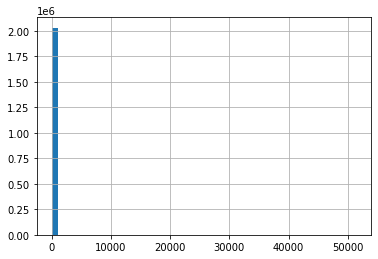

In [ ]:
# dtype('O') stands for Python "Object"
# Let's convert it to an integer.
runtime = titles["runtimeMinutes"]
# It wouldn't make sense to plot non numeric data
# So let's only extract the numeric values
runtime = runtime[runtime.str.isnumeric() == True]  
runtime = runtime.astype('int') 

ax = runtime.hist(bins = 50)

Hmm, though the graph above may be accurate, outliers are messing up the visual. Let's see if we can try to understand this data better.

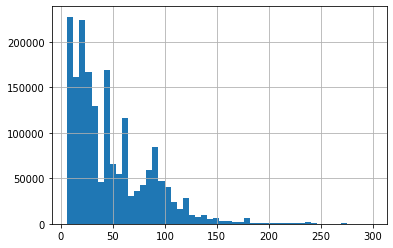

In [ ]:
runtime = runtime[runtime < 300]  # Titles lesser than 5 hours 
runtime = runtime[runtime > 5]  # Titles greater than 5 mins 

ax = runtime.hist(bins = 50)

Looks like our hypothesis was indeed correct! A few really long movies were messing up our visuals. While this graph is better, it still isn't the most informative graph because of an unnaturally high skew towards shorter length titles. This probably is the case because we haven't isolated movies, we are currently considering titles of all types. Let's see what happens when we isolate movies.

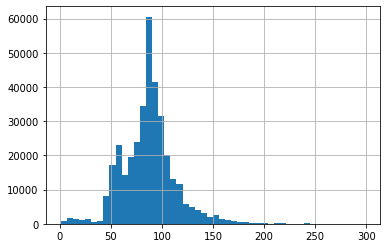

In [ ]:
runtime = titles[titles["titleType"] == "movie"]["runtimeMinutes"]  # Combining conditional and column selection
runtime = runtime[runtime.str.isnumeric() == True]
runtime = runtime.astype('int') 
runtime = runtime[runtime < 300]  # Titles lesser than 5 hours 

ax = runtime.hist(bins = 50)

Wonderful, now the data looks a lot more reasonable. We see good number of data points in the 1 - 2.5 hour range. 

If you are curious about the outlier movies, here you go:

In [ ]:
outlier_titles = titles[titles["titleType"] == "movie"][["primaryTitle", "runtimeMinutes"]]  # Combining conditional and column selection
outlier_titles = outlier_titles[outlier_titles["runtimeMinutes"].str.isnumeric() == True]
outlier_titles = outlier_titles.astype({'runtimeMinutes': 'int'})
outlier_titles = outlier_titles[outlier_titles["runtimeMinutes"] > 300]  # Titles greater than 5 hours 
outlier_titles = outlier_titles.sort_values(by=['runtimeMinutes'])
outlier_titles  

# There happen to be 352 movies longer than 5 hours with the longest one being 857 hours long!
# these outliers are good to keep in mind during our analysis.

,primaryTitle,runtimeMinutes
333773,"Sobri, ponyvafilm",301
30689,Dick Tracy's G-Men,302
72401,Winifred Wagner und die Geschichte des Hauses ...,302
5148407,Clint Lowery: The Sound and the Story,302
28140,Blake of Scotland Yard,303
...,...,...
3658107,Beijing 2003,9000
1451485,Qw,10062
3805866,Modern Times Forever,14400
2270117,Carnets Filmés (Liste Complète),28643


### Fix

During inspection, we would've gotten a good sense of some of the issues with our dataset. Most issues fall into the following categories.

* Irrelevant Data
* Duplicates
* Type Conversion
* Outliers
* Missing Values 
* Transformation(Scaling, Normalization)

Let's understand how to fix them.


#### Irrelevant data

In our dataset, we observed that there was tons of irrevelant information. 

We want to only keep the rows that have information regarding movies and the following columns:

```
tconst (string) - alphanumeric unique identifier of the title
primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
startYear (YYYY) – represents the release year of a title.
genres (string array) – includes up to three genres associated with the title.
```

We also want movies of only the last 10 years.


In [ ]:
# Get all possible genres
all_genres = titles["titleType"].unique()
print("These are all the possible genres:", all_genres)

These are all the possible genres: ['short' 'movie' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvShort' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame']


In [ ]:
# Let's look at only movies for now
movies_df =  titles[titles["titleType"]=="movie"]

# Further, lets pick the columns that we care about
movies_df =  movies_df[["tconst", "primaryTitle", "startYear", "genres"]]

movies_df.head()

,tconst,primaryTitle,startYear,genres
8,tt0000009,Miss Jerry,1894,Romance
144,tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
331,tt0000335,Soldiers of the Cross,1900,"Biography,Drama"
498,tt0000502,Bohemios,1905,\N
570,tt0000574,The Story of the Kelly Gang,1906,"Biography,Crime,Drama"


In [ ]:
# Last 10 years

# Filter out non numeric data
movies_df =  movies_df[movies_df["startYear"].str.isnumeric() == True]

# Pick movies only after 2010 and before 2021
movies_df =  movies_df[movies_df["startYear"].astype(int) > 2010]
movies_df =  movies_df[movies_df["startYear"].astype(int) < 2021]

movies_df.head()

,tconst,primaryTitle,startYear,genres
67689,tt0069049,The Other Side of the Wind,2018,Drama
70842,tt0072306,Toula ou Le génie des eaux,2017,Drama
98082,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
109006,tt0111414,A Thin Life,2018,Comedy
110062,tt0112502,Bigfoot,2017,"Horror,Thriller"


In [ ]:
# Interestingly, look at how the filtering has reduced the size of our dataset!
print(len(movies_df.index)) 

158606


#### Duplicates

Your data set could contain duplicate data. Let's see how to detect and fix it.

In [ ]:
# Here, I look at all the unique movie titles. While this isn't a perfect way to 
# measure duplicate data, this is enough to get a heuristic.

print(len(movies_df["primaryTitle"].unique()))
print(len(movies_df["primaryTitle"]))
movies_df.head()

147239
158606


,tconst,primaryTitle,startYear,genres
67689,tt0069049,The Other Side of the Wind,2018,Drama
70842,tt0072306,Toula ou Le génie des eaux,2017,Drama
98082,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
109006,tt0111414,A Thin Life,2018,Comedy
110062,tt0112502,Bigfoot,2017,"Horror,Thriller"


In [ ]:
# Based on the numbers above, looks like we have at least 10,000 non uniques movie 
# names. It's worth taking a closer look.

# Select all the movie names with duplicate title names. 
# Look here for more documentation regarding the duplicate function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
duplicates = movies_df[movies_df.duplicated(subset=['primaryTitle'],keep=False)]
duplicates = duplicates.sort_values(by=['primaryTitle'])
print(len(duplicates.index))
duplicates.tail(50)

18275


,tconst,primaryTitle,startYear,genres
4978049,tt5336076,Zion,2016,"Action,Drama,Fantasy"
4523622,tt4315044,Zion,2015,Drama
4189822,tt3562144,Zion,2012,Drama
5476583,tt6449436,Zkáza krásou,2016,\N
5037123,tt5466090,Zkáza krásou,2016,"Biography,Documentary"
5260945,tt5969746,Zoe,2018,Mystery
5279358,tt6010628,Zoe,2018,"Romance,Sci-Fi"
4930206,tt5228806,Zoe,2016,"Documentary,Drama,Family"
6690983,tt9053028,Zoetrope,2017,Animation
3200911,tt1862134,Zoetrope,2011,"Fantasy,Mystery"


There is most definitely some duplicate data. For instance, lets look at the two links for the movie Çagrilan [here](https://www.imdb.com/title/tt6412726/) and [here](https://www.imdb.com/title/tt5352034/). They clearly refer to the same movie due to the similarity of the release date.

However, simply looking at movie names may not be the best way to dedupe. An example here is that of the movie Ódio where the two entries do indeed refer to different movies. [Entry1](https://www.imdb.com/title/tt5737878/) & [Entry2](https://www.imdb.com/title/tt5471216/).

Another heuristic that comes to mind is maybe de-duplicating based on title release year pairs? While this seems like a good idea for the above to examples, it fails for the movies titled Zoom, which seem to have the same release year(2016) but do indeed refer to different movies. [Entry1](https://www.imdb.com/title/tt6667868/) & [Entry2](https://www.imdb.com/title/tt5815346/).

So as you can see here, there is no clear answer or perfect way to do this based on the way the data is arranged. This decision is left up to the engineer.

In [ ]:
len(movies_df[movies_df.duplicated(subset=['primaryTitle','startYear'],keep=False)])

4489

The chances of duplicate entries referring to the same movie are pretty high if released in the same year. The above line of code tells us that there are only ~4500 movies meeting this criteria. This accounts for 3% of our entire data set. Since this isn't significant enough for a simple analysis of genre popularity, we choose to leave the duplicates as is for now.

A couple of other things we can do with duplicated data is:

*   Delete duplicate items
*   Combine the entries (For instance, we could have aggregated valid genres across duplicate entries.)



#### Type Conversion

We can convert the types of any columns into datatypes that work better.

In [ ]:
movies_df.dtypes 

tconst          object
primaryTitle    object
startYear       object
genres          object
dtype: object

For instance, maybe it makes more sense to have `startYear` as an `int`.

In [ ]:
movies_df['startYear'] = movies_df['startYear'].astype(int)
movies_df.dtypes

tconst          object
primaryTitle    object
startYear        int64
genres          object
dtype: object

#### Outliers

This example doesn't deal with numerical aggregations(mean, stdev) of any sort. However, we saw that there were runtimes that skewed the overall view of the histogram when trying to get an understanding of runtime distribution. Similarly , there may be data that skews your data set. In this case, you could just get rid of the outliers.

#### Missing Values 

We noticed that our dataset had missing values before. `\N` was used as a placeholder. 

Dealing with missing values highly depends on the impact they have on your dataset. For instance,

*   If numerical data is missing and you need to do numerical analysis, it may be prudent to replace the missing values with a placeholder. This placeholder could be a static value, the result of interpolation, or a result obtained by any other appropriate method depending on your usecase.
*   If the missing data renders the entry useless, you may want to simply delete the row of data.

In our case, missing data in the genre column renders our data useless. Let's delete those rows.



In [ ]:
# ~6500 genreless movies! 
movies_df[movies_df["genres"] == "\\N"]

,tconst,primaryTitle,startYear,genres
181229,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,2011,\N
267966,tt0279481,Travel Daze,2019,\N
293323,tt0306058,Second Coming,2012,\N
317256,tt0330811,Regret Not Speaking,2011,\N
850817,tt0877604,Chûshingura,2016,\N
...,...,...,...,...
7096722,tt9907032,Footloose in London II: 2 Undiscovered and Unu...,2018,\N
7096900,tt9907396,Footloose in the Cotswolds - Part 1,2016,\N
7097005,tt9907608,Footloose in the Cotswolds - Part 2,2016,\N
7098597,tt9910922,Doctor Who Augmented Reality: Times Magazine,2013,\N


In [ ]:
movies_df = movies_df[movies_df["genres"] != "\\N"]
movies_df[movies_df["genres"] == "\\N"]  # Shows empty df beccause we removed all the missing value lines.

,tconst,primaryTitle,startYear,genres


#### Transformation

Depending on what kind of analysis you want to do, you may want to normalize or scale your numerical data.

### Verify

Finally, let's verify that our dataset looks workable now and that all the changes had their intended effects. It's usually good practice to make a list of what changes you made to the dataset and why for future debugging.

In [ ]:
movies_df.sample(50)  # Get 50 random entries

,tconst,primaryTitle,startYear,genres
3992064,tt3104324,Huldra: Lady of the Forest,2016,"Drama,Fantasy,Thriller"
4113000,tt3384218,Girls Like Us 2.0! The Hustle! The Game,2014,"Drama,Romance"
3542166,tt2224383,Ombis: Alien Invasion,2013,"Action,Horror,Sci-Fi"
3973297,tt3058212,The Man on Her Mind,2014,"Comedy,Romance"
3499806,tt2175926,Singapore Girl,2014,"Drama,Romance"
4448872,tt4147562,Saladcide 1: Green with Envy,2015,"Action,Comedy,Thriller"
3092892,tt1747958,Blood Ties,2013,"Action,Crime,Drama"
1602192,tt11106638,The Civility of Albert Cashier (Live),2017,Musical
3257794,tt1921162,The Magical Duvet,2011,"Comedy,Fantasy,Musical"
4969839,tt5317514,Juan,2019,Documentary


## Writing the data

Once we have the cleaned data, it is prudent to save it for use in the future. This was a relatively small dataset so processing didn't take too long. For larger datasets, it may be extremely time consuming to repeat this cleaning process.

In this case, we will write our data to a `csv`(comma seperated values) file.

Pandas supports writing data to many other formats(excel, markdown, latex) - feel free to take a look at the documentation to get a comprehensive list.



In [ ]:
movies_df.to_csv("/content/drive/My Drive/Intro to Programming for Econ/Data/cleaned_movie_data.csv", index=False)

You should now find a file called cleaned_movie_data in the files Tab on the left. It is recommended to download this file to your drive or local computer as this file will disappear when our current google colab session is over.

This file can be used to create a dataframe at any time using the [read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv) like we did before.

In [ ]:
movies_df = pd.read_csv("/content/drive/My Drive/Intro to Programming for Econ/Data/cleaned_movie_data.csv")
movies_df

,tconst,primaryTitle,startYear,genres
0,tt0069049,The Other Side of the Wind,2018,Drama
1,tt0072306,Toula ou Le génie des eaux,2017,Drama
2,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"
3,tt0111414,A Thin Life,2018,Comedy
4,tt0112502,Bigfoot,2017,"Horror,Thriller"
...,...,...,...,...
152163,tt9916428,The Secret of China,2019,"Adventure,History,War"
152164,tt9916538,Kuambil Lagi Hatiku,2019,Drama
152165,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
152166,tt9916706,Dankyavar Danka,2013,Comedy
